In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail_II.csv.zip") 
df.head() 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [109]:
df.shape

(1067371, 8)

# Data cleaning

In [110]:
# Removing null values

df.dropna(subset=['Customer ID', 'Description'], inplace=True)

In [111]:
# Removing cancelled invoices

C_Invoices = df['Invoice'].astype(str).str.startswith("C")   #Cancelled orders
df = df[~C_Invoices]   #Updating df after selecting non_cancelled orders row
df.shape

(805620, 8)

In [112]:
# Removing negative and empty values

df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [113]:
# Convert str to datetime format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [114]:
# New columns

df['TotalPrice'] = df['Quantity'] * df['Price']
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df.shape

(805549, 12)

In [115]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,Tuesday,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,Tuesday,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,Tuesday,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,Tuesday,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,Tuesday,7


# Deriving insights


In [116]:
# 1. Top 10 Selling Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Best-Selling Products:\n", top_products)

Top 10 Best-Selling Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     109169
WHITE HANGING HEART T-LIGHT HOLDER     93640
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          79913
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                75759
BROCADE RING PURSE                     71129
PACK OF 60 PINK PAISLEY CAKE CASES     55270
60 TEATIME FAIRY CAKE CASES            53495
PACK OF 72 RETROSPOT CAKE CASES        46107
Name: Quantity, dtype: int64


In [117]:
 
# 2. Revenue by Country (Top 5)
revenue_by_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTop 5 Countries by Revenue:\n", revenue_by_country.head())


Top 5 Countries by Revenue:
 Country
United Kingdom    1.472315e+07
EIRE              6.216311e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.552575e+05
Name: TotalPrice, dtype: float64


In [118]:

# 3. Average Revenue per Customer
avg_rev_customer = df.groupby('Customer ID')['TotalPrice'].sum().mean()
print(f"\nAverage Revenue per Customer: £{avg_rev_customer:.2f}")


Average Revenue per Customer: £3018.62


In [119]:
# 4. Counting number of purchases per customer
df['Customer ID'] = df['Customer ID'].astype(int)
frequent_buyers = df.groupby('Customer ID')['Invoice'].nunique().sort_values(ascending=False).head(10)
print("Top 10 frequent buyers\n", frequent_buyers)

Top 10 frequent buyers
 Customer ID
14911    398
12748    336
17841    211
15311    208
13089    203
14606    192
14156    156
17850    155
14646    151
18102    145
Name: Invoice, dtype: int64


In [120]:
# 5. Monthly total sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum().round(2)
print ("Monthly Sales\n", monthly_sales)

Monthly Sales
 Month
1     1126764.10
2      953508.42
3     1295109.75
4     1063809.55
5     1278580.35
6     1300280.27
7     1191727.75
8     1249586.55
9     1784453.38
10    2075998.79
11    2334153.42
12    2089456.84
Name: TotalPrice, dtype: float64


In [121]:
# 6. Correlation Matrix
correlation = df[['Quantity', 'Price', 'TotalPrice']].corr()
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
             Quantity     Price  TotalPrice
Quantity    1.000000 -0.004909    0.826590
Price      -0.004909  1.000000    0.135897
TotalPrice  0.826590  0.135897    1.000000


# Data Visualization

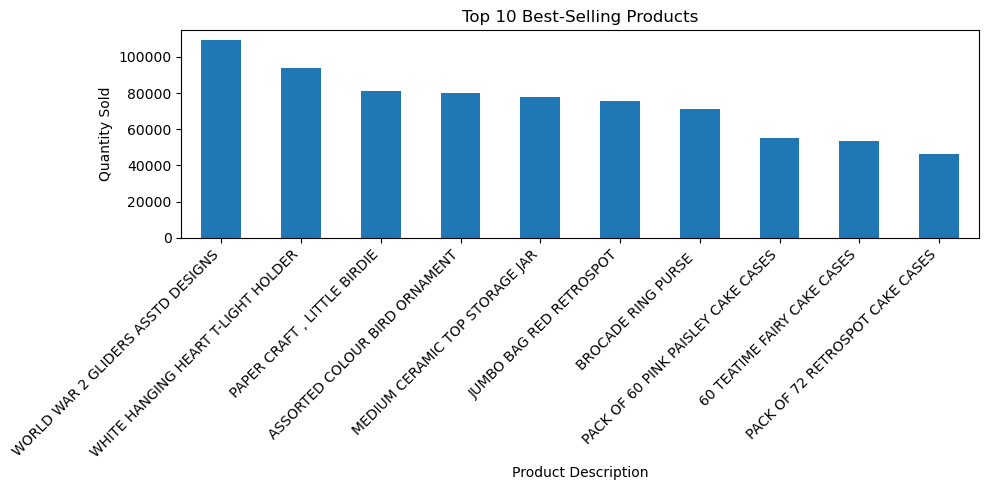

In [122]:
# Top-Selling Products (Bar Chart)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Quantity Sold')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

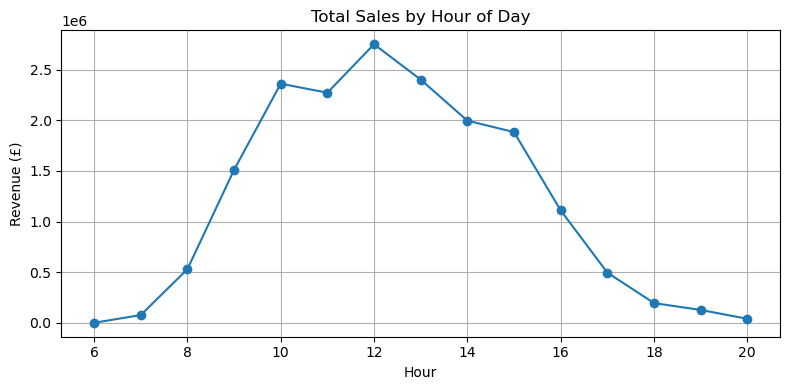

In [123]:
# Sales by Hour (Line Chart)
sales_by_hour = df.groupby('Hour')['TotalPrice'].sum()
plt.figure(figsize=(8, 4))
sales_by_hour.plot(kind='line', marker='o')
plt.title('Total Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Revenue (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


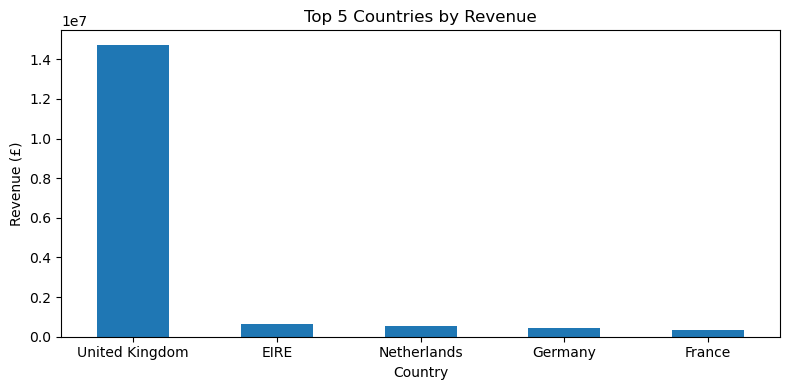

In [124]:
# Revenue by Top 5 Countries (Bar Chart)
plt.figure(figsize=(8, 4))
revenue_by_country.head().plot(kind='bar')
plt.title('Top 5 Countries by Revenue')
plt.xlabel('Country')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


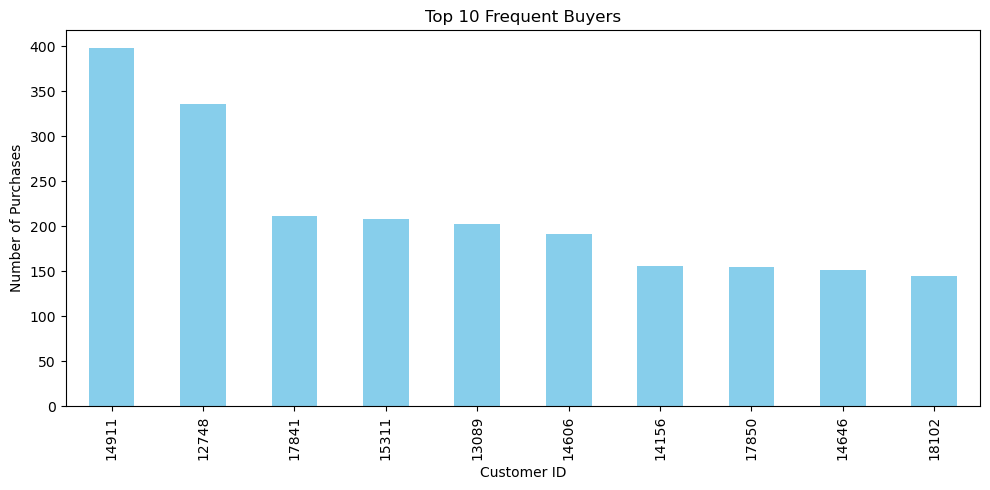

In [125]:
# Top 10 frequent buyers
plt.figure(figsize=(10, 5))
frequent_buyers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Frequent Buyers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Purchases')
plt.tight_layout()
plt.show()

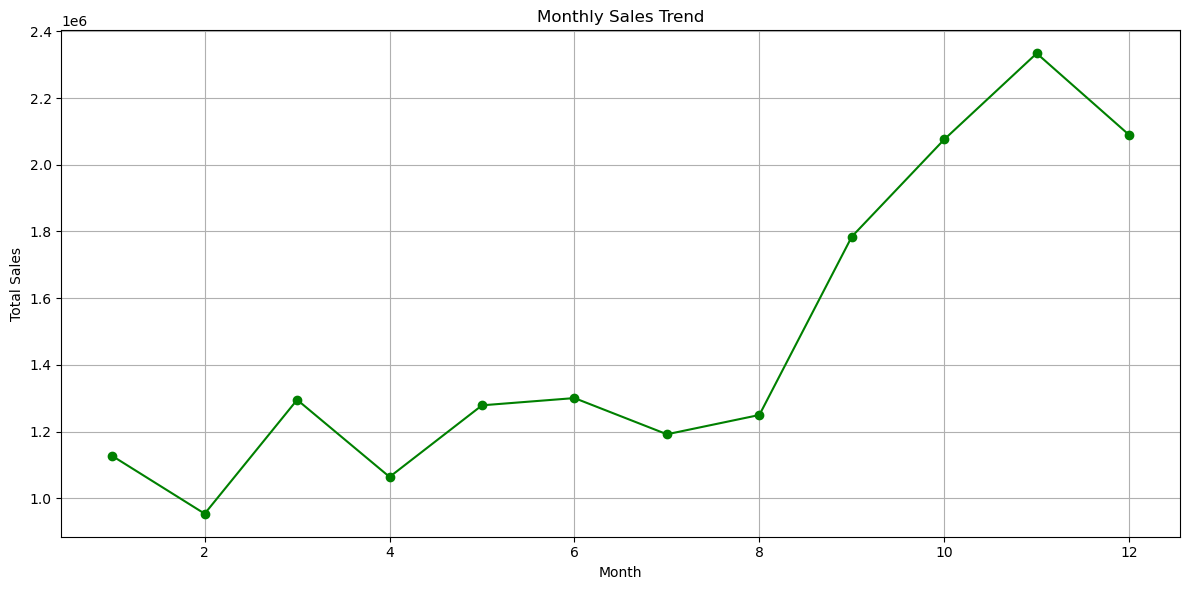

In [126]:
# Monthly Sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows more sales (seasonal peak) in november